# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

**Nicole_ Some background info: This will hold true regardless of whether the source population is normal or skewed, provided the sample size is sufficiently large (usually n > 30). If the population is normal, then the theorem holds true even for samples smaller than 30.**

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? **Yes**
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
      **Yes, n is larger than 100**
    <ul>
    
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    
   **t Statistic** If you don't know the standard deviation of the population, you have to use the standard deviation of your sample as a stand in when creating confidence intervals. Since the sample standard deviation may not match the population parameter the interval will have more error when you don't know the population standard deviation. To account for this error, we use what's known as a t-critical value instead of the z-critical value. The t-critical value is drawn from what's known as a t-distribution--a distribution that closely resembles the normal distribution but that gets wider and wider as the sample size falls. The t-distribution is available in scipy.stats with the nickname "t" so we can get t-critical values with stats.t.ppf().
    
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

# Question 1_ Is the distribution of body temperatures normal?

**My Anwser**: Yes it is normal, therefore the CLT could hold

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
import math

In [22]:
df = pd.read_csv('/Users/nisong/Desktop/human_body_temperature.csv')

In [23]:
df.columns.values

array(['temperature', 'gender', 'heart_rate'], dtype=object)

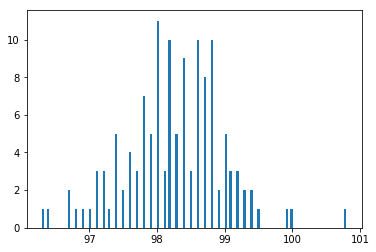

In [24]:
plt.hist(df['temperature'],bins=130)
plt.show()

In [25]:
len(df['temperature'])

130

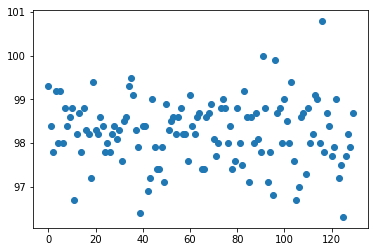

In [26]:
plt.scatter(range(130),df['temperature'])
plt.show()

# Question 2_ Is the sample size large? Are the observations independent? 

**My Anawer** Yes, n is larger than 100. The obersavations are independent

In [27]:
np.mean(df['temperature'])

98.24923076923078

# Question 3_ Is the true population mean really 98.6 degrees F?

^ Would you use a one-sample or two-sample test? Why? 

** My Answer** One sample test, since we're comparing the sample mean with population mean

^ In this situation, is it appropriate to use the  ttest  or  z  statistic?

** My Answer** ttest

# 1. t-test with null hypothesis of sample mean equal to population mean

In [28]:
stats.ttest_1samp(df['temperature'],98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

# Therefore, from the one-sample t-test, we can conclude that it is very unlikely that the sample mean is equal to the given population mean

# 2. z statistics with confidence level of 95%

In [29]:
sample_size = 130
sample_mean = df['temperature'].mean()

In [30]:
sample_mean
sample_size

130

In [31]:
t_critical = stats.t.ppf(q = 0.975, df=130)

In [32]:
print "t_critical value:"
print t_critical

t_critical value:
1.97838040543


In [33]:
sample_stdev = df['temperature'].std()
sigma = sample_stdev/math.sqrt(sample_size)
margin_of_error = t_critical*sigma
confidence_intervel = (sample_mean - margin_of_error, sample_mean + margin_of_error)

In [34]:
confidence_intervel

(98.122012170976276, 98.376449367485279)

# Conclusion: Through both one sample t-test and z statistics, we can conclude that it is very unlikely that the sample mean is equal to the given population mean, with a confidence level of 95%

#  Question 4. Draw a small sample of size 10 from the data and repeat both tests. 

# One Sample test

In [35]:
sample = np.random.choice(a = df['temperature'], size = 10)

In [36]:
sample

array([ 98. ,  97.2,  98.4,  97.7,  98.6,  98.5,  97.8,  98.8,  99. ,  98.3])

In [37]:
stats.ttest_1samp(sample,98.6)

Ttest_1sampResult(statistic=-2.1201591426642192, pvalue=0.06302128930096651)

# z statistics

In [38]:
samll_sample_size = 10
small_sample_mean = sample.mean()
small_sample_stdev = sample.std()
sigma = sample_stdev/math.sqrt(sample_size)
print "small_sample_mean: " 
print small_sample_mean
print "sigma : "
print sigma

small_sample_mean: 
98.23
sigma : 
0.0643044168379


In [39]:
t_critical = stats.t.ppf(q= 0.976,df = 10)
print t_critical

2.25220062536


In [40]:
margin_of_error = t_critical*sigma
confidence_intervel = (sample_mean - margin_of_error, sample_mean + margin_of_error)
print "confidence_intervel:"
confidence_intervel

confidence_intervel:


(98.104404321414876, 98.394057217046679)

# Conclusion: While the sample size is too small, both one-sample t-test and z statistics are not approporiate. 

while the sample size is very small, with n =10, the one sample t-test indicates that we can't reject the null-hypothesis with a confidence-level of 95%.  And the z-statistics sometimes indicates that the sample mean is different from the population mean, but some times the result is reverse. 




# Question 5 At what temperature should we consider someone's temperature to be "abnormal"?


In [41]:
sample_size = len(df['temperature'])
sample_mean = df['temperature'].mean()
sample_stdev = df['temperature'].std()
sigma = sample_stdev/math.sqrt(sample_size)
print "sample_size: " + str(sample_size)
print "sample_mean: " + str(sample_mean)
print "sample_stdev :" + str(sample_stdev)
print "sigma : " + str(sigma)

sample_size: 130
sample_mean: 98.2492307692
sample_stdev :0.733183158039
sigma : 0.0643044168379


**Take a 95% confidence level as the scope of normal temperature **

In [42]:
z_score = stats.norm.ppf(0.975)
print z_score

1.95996398454


In [43]:
margin_of_error = sigma*z_score
print margin_of_error

0.126034341049


In [44]:
confidence_intervel = (sample_mean - margin_of_error, sample_mean + margin_of_error)
print "confidence_intervel is : " + str(confidence_intervel)

confidence_intervel is : (98.123196428181657, 98.375265110279898)


# Conclusion: we can conclude that at a 95% confidence level, we can conclude that temprature lower tha 98.12 and higher than 98.37 could be seen as abnormal.










# Question 6  Is there a significant difference between males and females in normal temperature?**



# ttest: null-hypothesis: males and females in normal temperature is equal, 95% confidence level

In [45]:
Female = df[df['gender']=='F']
Female_value = Female.loc[:, 'temperature'].values
print Female_value

[  99.3   98.4   99.2   98.    98.4   98.6   98.8   96.7   98.7   97.8
   98.8   98.3   97.2   98.3   98.    97.8   98.2   98.4   97.6   97.9
   96.4   98.4   99.    97.9   98.9   98.3   98.5   98.2   98.6   98.8
   98.2   99.1   98.2   98.7   97.4   98.7   98.1   97.7   98.    98.8
   99.2   98.6   98.6  100.    98.8   96.8   99.9   98.7   98.8   98.
   99.4   98.7   98.8   98.    98.2   99.1  100.8   97.8   98.4   97.7
   97.9   99.    97.2   98.2   98.7]


In [46]:
Male = df[df['gender']=='M']
Male_value = Male.loc[:, 'temperature'].values
print Male_value

[ 97.8  99.2  98.   98.8  98.2  98.2  99.4  98.2  98.6  98.4  97.8  98.1
  98.3  98.5  98.6  99.3  99.5  99.1  98.3  98.4  96.9  97.2  97.4  97.4
  97.9  97.1  98.6  98.2  97.6  98.4  98.6  97.4  98.6  98.9  98.   98.8
  99.   98.8  98.4  97.4  97.6  98.   97.5  97.1  98.   98.7  98.1  97.8
  97.1  97.8  98.   99.   98.5  97.6  96.7  97.   98.6  97.3  99.   98.
  98.7  97.5  96.3  97.7  97.9]


Null-hypothesis: males' normal temprature is equal to femals' normal temprature

In [47]:
stats.ttest_ind(Female_value, Male_value, equal_var = False)

Ttest_indResult(statistic=2.2854345381656112, pvalue=0.023938264182934196)

In [48]:
statsmodels.stats.proportion.proportions_ztest（[]）


statsmodels.stats.proportion.proportions_ztest(count, nobs, value=None, alternative='two-sided', prop_var=False)[source]¶

SyntaxError: invalid syntax (<ipython-input-48-cfb61a9954a0>, line 1)

# Conlusion: We can conclude that with a confidence level of 95%, males and females in normal temperature is not equal